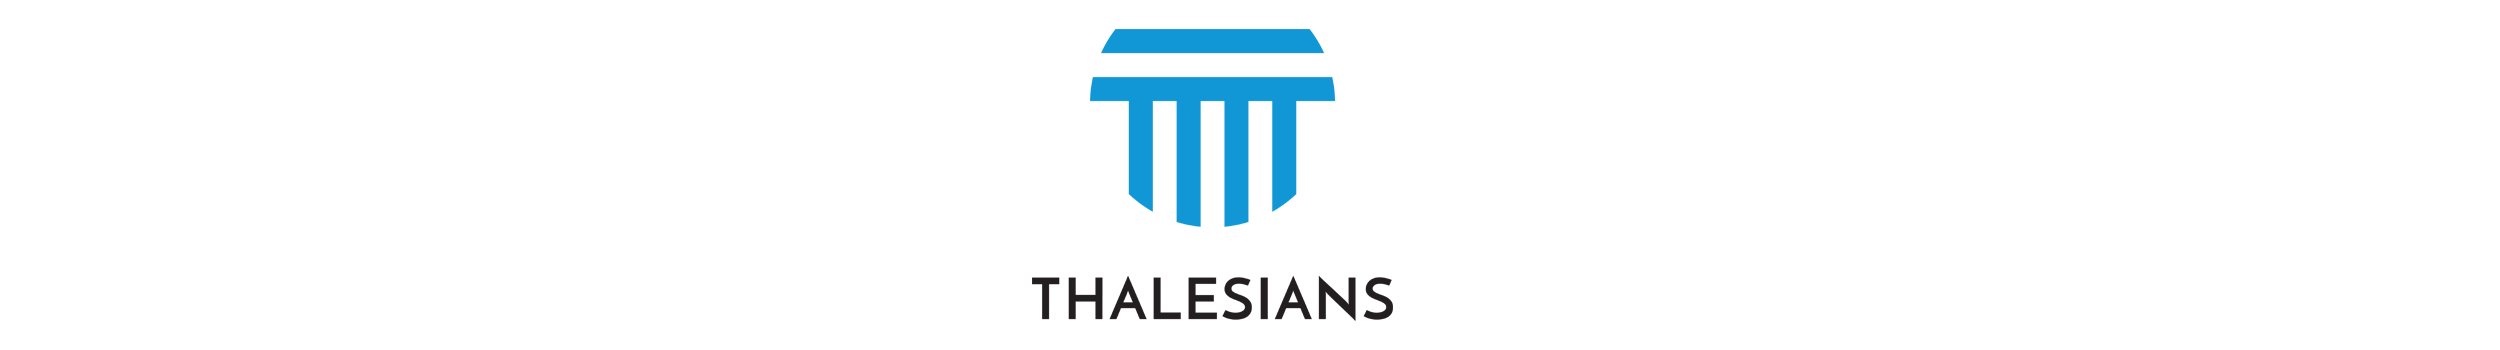

In [1]:
# Copyright (c) Thalesians Ltd, 2018-2019. All rights reserved
# Copyright (c) Paul Alexander Bilokon, 2018-2019. All rights reserved
# Author: Paul Alexander Bilokon <paul@thalesians.com>
# Version: 2.0 (2019.04.19)
# Previous versions: 1.0 (2018.08.03)
# Email: education@thalesians.com
# Platform: Tested on Windows 10 with Python 3.6

# Linear algebra &mdash; part ii: matrices

## Motivation

In data science, machine learning (ML), and artificial intelligence (AI), we usually deal not with single numbers but with *multivariate* (i.e. containing multiple elements or entries) lists of numbers &mdash; mathematically speaking, **vectors**, &mdash; and *multivariate* tables of numbers &mdash; mathematically speaking, **matrices**. Therefore we solve *multivariate* equations, apply *multivariate* calculus to find optima of *multivariate* functions, etc.

The branch of mathematics that studies vectors, matrices, and related mathematical objects is called **linear algebra**. It is one of the most practically useful areas of mathematics in applied work and a prerequisite for data science, machine learning (ML), and artificial intelligence (AI).

## Objectives

* To consider matrices.
* To introduce the transpose of a matrix.
* To demonstrate that matrices, like vectors, form a vector space.
* To introduce matrix multiplication and consider four different views of matrix multiplication.
* To introduce the identity matrix.
* To introduce linear systems.
* To introduce matrix inverses.
* To demonstrate that matrices "work" on vectors as linear operators.
* To introduce the notion of a determinant.
* To consider in more detail the homogeneous and nonhomogeneous linear systems.
* To consider when a square matrix is invertible and introduce the invertible matrix theorem.
* To introduce gradients (grad), Jacobians, and Hessians.

So that plots can appear inline in our Jupyter notebook, we should issue the "magic" command

In [2]:
%matplotlib inline

We also import several Python libraries that we use in this Jupyter notebook:

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Matrices

Vectors can be further generalised &mdash; to **matrices**. Instead of *lists* of numbers we could consider *tables* of numbers. E.g., we could have a two-by-three matrix (one with two rows and three columns):
$$\mathbf{A} = \begin{pmatrix} 3.5 & 7 & 8.3 \\ 5.73 & 0 & -5 \end{pmatrix} \in \mathbb{R}^{2 \times 3}.$$

Vectors are matrices too. By default, we think of vectors as **column vectors**, i.e.
$$\begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix} \in \mathbb{R}^{3 \times 1},$$
although we may also deal with **row vectors**,
$$\begin{pmatrix} -3 & 3 & 5 \end{pmatrix} \in \mathbb{R}^{1 \times 3}.$$

Matrices can be implemented in Python as two-dimensional NumPy arrays. In particular, we can represent the $2 \times 3$ matrix $\mathbf{A}$, which we have just introduced, as

In [4]:
A = np.array([[3.5, 7., 8.3], [5.73, 0., -5.]])

In data science, we usually deal with tables of observations. Such as this table from the real estate valuation dataset from the paper

Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271

which can be found on https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [5]:
import pandas as pd
df = pd.DataFrame({
    'transaction date': [2012.917, 2012.917, 2013.583, 2013.500, 2012.833], 'house age': [32.0, 19.5, 13.3, 13.3, 5.0],
    'distance to the nearest MRT station': [84.87882, 306.59470, 561.98450, 561.98450, 390.56840],
    'number of convenience stores': [10, 9, 5, 5, 5],
    'latitude': [24.98298, 24.98034, 24.98746, 24.98746, 24.97937],
    'longitude': [121.54024, 121.53951, 121.54391, 121.54391, 121.54245],
    'house price per unit area': [37.9, 42.2, 47.3, 54.8, 43.1]
}, columns=[
    'transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores',
    'latitude', 'longitude', 'house price per unit area'
])
df

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price per unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


It is natural to represent such tables as matrices.

While we usually use Pandas `DataFrame`s to represent such tables in Python, as we just did above, the raw data, which is used for calculations, is usually represented as NumPy arrays. We can obtain the NumPy array representing the matrix behind the above table with

In [6]:
df.values

array([[ 2012.917  ,    32.     ,    84.87882,    10.     ,    24.98298,
          121.54024,    37.9    ],
       [ 2012.917  ,    19.5    ,   306.5947 ,     9.     ,    24.98034,
          121.53951,    42.2    ],
       [ 2013.583  ,    13.3    ,   561.9845 ,     5.     ,    24.98746,
          121.54391,    47.3    ],
       [ 2013.5    ,    13.3    ,   561.9845 ,     5.     ,    24.98746,
          121.54391,    54.8    ],
       [ 2012.833  ,     5.     ,   390.5684 ,     5.     ,    24.97937,
          121.54245,    43.1    ]])

## Transposes

The **transpose** of a $p \times q$ matrix $\mathbf{A}$ is the $q \times p$ matrix $\mathbf{A}^{\intercal}$ such that its $(i, j)$-th element is equal to the $(j, i)$-th element of $\mathbf{A}$:
$$(\mathbf{A}^{\intercal})_{i, j} = (\mathbf{A})_{j, i}, \quad 1 \leq i \leq q, 1 \leq j \leq p.$$

Thus, if
$$\mathbf{A} = \begin{pmatrix} 3.5 & 7 & 8.3 \\ 5.73 & 0 & -5 \end{pmatrix} \in \mathbb{R}^{2 \times 3},$$
then
$$\mathbf{A}^{\intercal} = \begin{pmatrix} 3.5 & 5.73 \\ 7 & 0 \\ 8.3 & -5 \end{pmatrix} \in \mathbb{R}^{3 \times 2}.$$

Thus we can think of the transpose of a matrix as a kind of *flip*, in which its rows become columns (and vice versa).

It is easy to obtain the transpose of a matrix in NumPy:

In [7]:
A = np.array([[3.5, 7., 8.3], [5.73, 0., -5.]])
A

array([[ 3.5 ,  7.  ,  8.3 ],
       [ 5.73,  0.  , -5.  ]])

In [8]:
A.T

array([[ 3.5 ,  5.73],
       [ 7.  ,  0.  ],
       [ 8.3 , -5.  ]])

A matrix, which is equal to its transpose, is called **symmetric**. It goes without saying that a symmetric matrix must be **square**, i.e. the number of rows in that matrix must be equal the number of columns in that matrix.

The matrix
$$\mathbf{A} = \begin{pmatrix} 3.5 & 7 & 8.3 \\ 5.73 & 0 & -5 \end{pmatrix} \in \mathbb{R}^{2 \times 3},$$
which we introduced above, is neither square, nor, or course, is it symmetric.

The matrix
$$\mathbf{B} = \begin{pmatrix} 18 & 4 \\ -11 & 22 \end{pmatrix} \in \mathbb{R}^{2 \times 2}$$
is square, but it is not symmetric.

The matrix
$$\mathbf{C} = \begin{pmatrix} 18 & 4 \\ 4 & 22 \end{pmatrix} \in \mathbb{R}^{2 \times 2}$$
is a square, symmetric matrix. It is clearly equal to its transpose, $\mathbf{C}^{\intercal}$.

## Matrices are a vector space

Two matrices with the same number of rows and the same number of columns can be **added**, elementwise, just like vectors.

For example, if
$$\mathbf{A} = \begin{pmatrix} 3.5 & 7 & 8.3 \\ 5.73 & 0 & -5 \end{pmatrix} \in \mathbb{R}^{2 \times 3}, \quad \mathbf{B} = \begin{pmatrix} 4 & 18 & 22 \\ -3 & 5.7 & 9.3 \end{pmatrix} \in \mathbb{R}^{2 \times 3},$$
then
$$\mathbf{A} + \mathbf{B} = \begin{pmatrix} 3.5 + 4 & 7 + 18 & 8.3 + 22 \\ 5.73 + (-3) & 0 + 5.7 & -5 + 9.3 \end{pmatrix} = \begin{pmatrix} 7.5 & 25 & 30.3 \\ 2.73 & 5.7 & 4.3 \end{pmatrix} \in \mathbb{R}^{2 \times 3}.$$

We can conveniently add up matrices in Python using the habitual $+$ operator if the matrices are represented as NumPy arrays:

In [9]:
A = np.array([[3.5, 7., 8.3], [5.73, 0., -5.]])

In [10]:
B = np.array([[4., 18., 22.], [-3., 5.7, 9.3]])

In [11]:
A + B

array([[  7.5 ,  25.  ,  30.3 ],
       [  2.73,   5.7 ,   4.3 ]])

Also, just like vectors, matrices can be **multiplied** (elementwise) by scalars.

For example, if
$$\mathbf{A} = \begin{pmatrix} 3.5 & 7 & 8.3 \\ 5.73 & 0 & -5 \end{pmatrix} \in \mathbb{R}^{2 \times 3},$$
then
$$3 \cdot \mathbf{A} = 3 \cdot \begin{pmatrix} 3.5 & 7 & 8.3 \\ 5.73 & 0 & -5 \end{pmatrix} = \begin{pmatrix} 3 \cdot 3.5 & 3 \cdot 7 & 3 \cdot 8.3 \\ 3 \cdot 5.73 & 3 \cdot 0 & 3 \cdot (-5) \end{pmatrix} = \begin{pmatrix} 10.5 & 21 & 24.9 \\ 17.19 & 0 & -15 \end{pmatrix} \in \mathbb{R}^{2 \times 3}.$$

In [12]:
3. * A

array([[ 10.5 ,  21.  ,  24.9 ],
       [ 17.19,   0.  , -15.  ]])

Taken with the operations of matrix addition and multiplication by scalars, the $p \times q$ matrices form a vector space, which we can denote by $\mathbb{R}^{p \times q}$, just as we denote the corresponding set.

#### Exercise

Show that, if $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{p \times q}$, then
$$(\mathbf{A} + \mathbf{B})^{\intercal} = \mathbf{A}^{\intercal} + \mathbf{B}^{\intercal}.$$

#### Exercise

Show that, if $\mathbf{A} \in \mathbb{R}^{p \times p}$, then
$$\frac{1}{2} (\mathbf{A} + \mathbf{A}^{\intercal})$$
is symmetric.

In numerical analysis this trick is often employed when the matrix in an algorithm needs to be symmetric, but isn't quite symmetric (this may happen after several iterations of the algorithm). We can then **"symmetrise"** it:

In [13]:
A = np.array([[9., -5., 11.], [-5., 25., 4.], [12., 5., 36.]])
A

array([[  9.,  -5.,  11.],
       [ -5.,  25.,   4.],
       [ 12.,   5.,  36.]])

In [14]:
.5 * (A + A.T)

array([[  9. ,  -5. ,  11.5],
       [ -5. ,  25. ,   4.5],
       [ 11.5,   4.5,  36. ]])

## Matrix multiplication

Although multiplication of matrices by matrices is not one of the operations under which matrices form a vector space, it is no less important than matrix addition and multiplication by scalars.

Matrix multiplication forms the backbone of many machine learning and scientific computing algorithms.

We can only multiply two matrices if their sizes are **compatible**: the number of columns of the first matrix must equal the number of rows of the second.

The product of two matrices, $\mathbf{A} \in \mathbb{R}^{p \times q}$ and $\mathbf{B} \in \mathbb{R}^{q \times r}$, is given by the matrix $\mathbf{A}\mathbf{B} \in \mathbb{R}^{p \times r}$, whose $(i, j)$th element, $1 \leq i \leq p$, $1 \leq j \leq r$, is given by
$$(\mathbf{A}\mathbf{B})_{i, j} = \sum_{k=1}^q \mathbf{A}_{i, k} \mathbf{B}_{k, j}.$$

Consider the matrices
$$\mathbf{A} = \begin{pmatrix} 3.7 & 7 & 8.3 \\ 5.73 & 0 & -5 \end{pmatrix} \in \mathbb{R}^{2 \times 3}, \quad \mathbf{B} = \begin{pmatrix} 10.3 & 5.3 \\ 7.8 & 0 \\ -3.57 & 9.3 \end{pmatrix} \in \mathbb{R}^{3 \times 2}.$$

In NumPy, matrix multiplication is implemented using `np.dot`:

In [15]:
A = np.array([[3.5, 7., 8.3], [5.73, 0., -5.]])
B = np.array([[10.3, 5.3], [7.8, 0.0], [-3.57, 9.3]])
np.dot(A, B)

array([[ 61.019,  95.74 ],
       [ 76.869, -16.131]])

There are different ways of looking at matrix multiplication.

### First view of matrix multiplication

We can think of the matrix product considering the individual elements of the result:
$$\mathbf{A}\mathbf{B} = \begin{pmatrix} 3.7 \cdot 10.3 + 7 \cdot 7.8 + 8.3 \cdot (-3.57) & 3.7 \cdot 5.3 + 7 \cdot 0 + 8.3 \cdot 9.3 \\ 5.73 \cdot 10.3 + 0 \cdot 7.8 + (-5) \cdot (-3.57) & 5.73 \cdot 5.3 + 0 \cdot 0 + (-5) \cdot 9.3 \end{pmatrix}.$$

Notice that the individual individual elements are given by
$$(\mathbf{A}\mathbf{B})_{1,1} = \begin{pmatrix} 3.7 & 7 & 8.3 \end{pmatrix} \begin{pmatrix} 10.3 \\ 7.8 \\ -3.57 \end{pmatrix},$$
$$(\mathbf{A}\mathbf{B})_{1,2} = \begin{pmatrix} 3.7 & 7 & 8.3 \end{pmatrix} \begin{pmatrix} 5.3 \\ 0 \\ 9.3 \end{pmatrix},$$
$$(\mathbf{A}\mathbf{B})_{2,1} = \begin{pmatrix} 5.73 & 0 & -5 \end{pmatrix} \begin{pmatrix} 10.3 \\ 7.8 \\ -3.57 \end{pmatrix},$$
$$(\mathbf{A}\mathbf{B})_{2,2} = \begin{pmatrix} 5.73 & 0 & -5 \end{pmatrix} \begin{pmatrix} 5.3 \\ 0 \\ 9.3 \end{pmatrix},$$
i.e. by the dot products of the row vectors of $\mathbf{A}$ with the column vectors of $\mathbf{B}$.

Incidentally, if we regard the vectors $\mathbf{u}, \mathbf{v} \in \mathbb{R}^k$, $k = 2, 3, 4, \ldots$, as column vectors, then the dot product can be written as a matrix product
$$\langle \mathbf{u}, \mathbf{v} \rangle = \mathbf{u}^{\intercal} \mathbf{v},$$
since the transpose of a column vector is a row vector.

The transpose is on the "inside" of this product, a good mnemonic for remembering that the dot product is also known as the *inner* product. The result is $1 \times 1$, so corresponds to a scalar.

### Second view of matrix multiplication

There is another way of looking at this product. Notice that the first column of the product $\mathbf{A}\mathbf{B}$ is given by a linear combination of the columns of $\mathbf{A}$, the weights being given by the values in the first column of $\mathbf{B}$:
$$(\mathbf{A}\mathbf{B})_{:,1} = 10.3 \cdot \begin{pmatrix} 3.7 \\ 5.73 \end{pmatrix} + 7.8 \cdot \begin{pmatrix} 7 \\ 0 \end{pmatrix} + (-3.57) \cdot \begin{pmatrix} 8.3 \\ -5 \end{pmatrix}.$$

Similarly, the second column of $\mathbf{A}\mathbf{B}$ is given by a linear combination of the columns of $\mathbf{A}$, the weights being given by the values in the second column of $\mathbf{B}$:
$$(\mathbf{A}\mathbf{B})_{:,2} = 5.3 \cdot \begin{pmatrix} 3.7 \\ 5.73 \end{pmatrix} + 0 \cdot \begin{pmatrix} 7 \\ 0 \end{pmatrix} + 9.3 \cdot \begin{pmatrix} 8.3 \\ -5 \end{pmatrix}.$$

### Third view of matrix multiplication

Also notice that the first row of the product $\mathbf{A}\mathbf{B}$ is given by a linear combination of the rows of $\mathbf{B}$, the weights being given by the values in the first row of $\mathbf{A}$:
$$(\mathbf{A}\mathbf{B})_{1,:} = 3.7 \cdot \begin{pmatrix} 10.3 & 5.3 \end{pmatrix} + 7 \cdot \begin{pmatrix} 7.8 & 0 \end{pmatrix} + 8.3 \cdot \begin{pmatrix} -3.57 & 9.3 \end{pmatrix}.$$

Similarly, the second row of the product $\mathbf{A}\mathbf{B}$ is given by a linear combination of the rows of $\mathbf{B}$, the weights being given by the values in the second row of $\mathbf{A}$:
$$(\mathbf{A}\mathbf{B})_{1,:} = 5.73 \cdot \begin{pmatrix} 10.3 & 5.3 \end{pmatrix} + 0 \cdot \begin{pmatrix} 7.8 & 0 \end{pmatrix} + (-5) \cdot \begin{pmatrix} -3.57 & 9.3 \end{pmatrix}.$$

Notice that matrix multiplication is not, in general, **commutative**: $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$. In this it differs significantly from scalar multiplication.

In [16]:
C = np.array([[3., 5.], [0., -7.]])
D = np.array([[0., -8.], [10., 12.]])
np.dot(C, D)

array([[ 50.,  36.],
       [-70., -84.]])

In [17]:
np.dot(D, C)

array([[  0.,  56.],
       [ 30., -34.]])

### Fourth view of matrix multiplication

Whereas the *inner* product of two column vectors $\mathbf{u}, \mathbf{v} \in \mathbb{R}^{k \times 1}$ is 1-by-1, so a scalar, the **outer product**, defined as $\mathbf{u}\mathbf{v}^{\intercal}$ is a $k \times k$ matrix. It is essentially a "multiplication table": its $(i, j)$th entry is given by $u_i \cdot v_j$.

The fourth view of matrix multiplication is viewed as a sum of outer products of the columns of $\mathbf{A}$ with the rows of $\mathbf{B}$:
$$\mathbf{A}\mathbf{B} = \begin{pmatrix} 3.7 \\ 5.73 \end{pmatrix} \begin{pmatrix} 10.3 & 5.3 \end{pmatrix} + \begin{pmatrix} 7 \\ 0 \end{pmatrix} \begin{pmatrix} 7.8 & 0 \end{pmatrix} + \begin{pmatrix} 8.3 \\ -5 \end{pmatrix} \begin{pmatrix} -3.57 & 9.3 \end{pmatrix}.$$

#### Exercise

While matrix multiplication is not commutative, it is associative:
$$\mathbf{A}(\mathbf{B}\mathbf{C}) = (\mathbf{A}\mathbf{B})\mathbf{C}$$
(we are assuming that the matrices are compatible, as required). Prove the associativity of matrix multiplication.

#### Exercise

Prove that
$$(\mathbf{A}\mathbf{B})^{\intercal} = \mathbf{B}^{\intercal}\mathbf{A}^{\intercal}.$$

#### Exercise

Prove that, if $\mathbf{A} \in \mathbb{R}^{n \times n}$, and $\mathbf{x}, \mathbf{y} \in \mathbb{R}^{n \times 1}$, then
$$\mathbf{x}^{\intercal} A \mathbf{y} = \sum_{j=1}^n \sum_{k=1}^n A_{j,k} x_j y_k.$$

We sometimes refer to the above as the **inner product induced by $\mathbf{A}$**.

#### Exercise

Let $\mathbf{A} \in \mathbb{R}^{n \times n}$ and $\mathbf{e}_1, \mathbf{e}_2, \ldots, \mathbf{e}_n$ be the standard basis. Show that $A_{jk} = \mathbf{e}_j^{\intercal} A \mathbf{e}_k$.

## The identity matrix

The special square matrix $\mathbf{I}_n \in \mathbb{R}^{n \times n}$ with ones in the diagonal and zeros everywhere else is called the matrix **identity**. When multiplied by any compatible matrix on the left or on the right it gives the same matrix:
$$\mathbf{I}_n \mathbf{A} = \mathbf{A}, \quad \mathbf{B} \mathbf{I}_n = \mathbf{B}.$$

In NumPy, we can use `np.eye` to "manufacture" an identity matrix:

In [18]:
I2 = np.eye(2)
I2

array([[ 1.,  0.],
       [ 0.,  1.]])

In [19]:
C = np.array([[3., 5.], [0., -7.]])
np.dot(I2, C)

array([[ 3.,  5.],
       [ 0., -7.]])

In [20]:
np.dot(C, I2)

array([[ 3.,  5.],
       [ 0., -7.]])

In [21]:
I3 = np.eye(3)
I3

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [22]:
I4 = np.eye(4)
I4

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

## Linear systems

Recall that in the section on linear combinations we tried to obtain an arbitrary vector $\mathbf{b}$ as a linear combination of two other vectors, $\mathbf{u} = \begin{pmatrix} 4 \\ 6 \end{pmatrix}$ and $\mathbf{v} = \begin{pmatrix} 5 \\ 3 \end{pmatrix}$. In other words, we tried to find such $x_1$ and $x_2$ that
$$x_1 \mathbf{u} + x_2 \mathbf{v} = \mathbf{b}.$$

We found that finding $x_1$ and $x_2$ amounts to solving a system of linear equations, a **linear system**.

If we write $\mathbf{u}$ and $\mathbf{v}$ as columns of a matrix, $\mathbf{A}$, we can express this linear system as a matrix equation,
$$A\mathbf{x} = \mathbf{b},$$
where $\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$.

The solution of linear systems is one of the most ubiquitous tasks in scientific computing, including machine learning.

It can be performed using straightforward algorithms, such as **Gauss-Jordan elimination**.

In Python, we can use `np.linalg.solve(A, b)` to solve linear systems:

In [23]:
A = np.array([[4., 5.], [6., 3.]])
b = np.array([-7., 3.])
np.linalg.solve(A, b)

array([ 2., -3.])

## Inverses

The inverse of a square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ is another square matrix $A^{-1} \in \mathbb{R}^{n \times n}$, such that
$$\mathbf{A} \mathbf{A}^{-1} = \mathbf{A}^{-1} \mathbf{A} = \mathbf{I}_n.$$

In [24]:
C = np.array([[3., 5.], [0., -7.]])
Cinv = np.linalg.inv(C)
Cinv

array([[ 0.33333333,  0.23809524],
       [ 0.        , -0.14285714]])

In [25]:
np.dot(C, Cinv)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [26]:
np.dot(Cinv, C)

array([[  1.00000000e+00,   2.22044605e-16],
       [  0.00000000e+00,   1.00000000e+00]])

Note that, in the above example, solving the linear system amounts to inverting the matrix, since
$$\mathbf{A} \mathbf{x} = \mathbf{b}$$
implies
$$\mathbf{A}^{-1} \mathbf{A} \mathbf{x} = \mathbf{A}^{-1} \mathbf{b},$$
i.e.
$$\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}.$$

In [27]:
A = np.array([[4., 5.], [6., 3.]])
b = np.array([-7., 3.])
np.linalg.solve(A, b)

array([ 2., -3.])

In [28]:
np.linalg.inv(A)

array([[-0.16666667,  0.27777778],
       [ 0.33333333, -0.22222222]])

In [29]:
np.dot(np.linalg.inv(A), b)

array([ 2., -3.])

## Matrices as linear operators

We can think of scalars as working (operating) on vectors when we multiply vectors by these scalars.

In [30]:
v = np.array([3., 5.])
minus_half_v = -.5 * v
three_v = 3 * v
minus_two_v = -2. * v

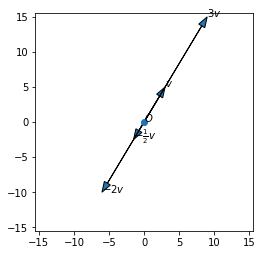

In [31]:
plt.plot(0, 0, 'o')
plt.annotate('$O$', [0, 0])
plt.arrow(0, 0, v[0], v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$v$', v)
plt.arrow(0, 0, minus_half_v[0], minus_half_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$-\\frac{1}{2} v$', minus_half_v)
plt.arrow(0, 0, three_v[0], three_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$3 v$', three_v)
plt.arrow(0, 0, minus_two_v[0], minus_two_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$-2 v$', minus_two_v)
plt.axis([-15.5, 15.5, -15.5, 15.5])
plt.gca().set_aspect('equal', adjustable='box')

Note that scalars can only rescale vectors (hence the name: "scalar"). If the scalar is negative, the direction of the vector is "flipped" but remains along the same line.

Matrices also operate on vectors. For this reason they are sometimes referred to as **operators**.

Consider, for example, the two-dimensional rotation matrix that rotates the vector through the angle of $\theta$:
$$A = \begin{pmatrix} \cos \theta & - \sin \theta \\ \sin \theta & \cos \theta \end{pmatrix}:$$

In [32]:
angle = math.pi / 3.   # In radians; equal to 60 degrees
A = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
A

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

In [33]:
A_v = np.dot(A, v)
A_v

array([-2.83012702,  5.09807621])

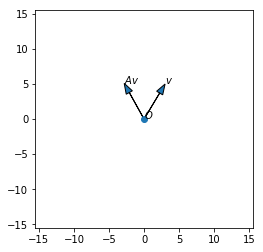

In [34]:
plt.plot(0, 0, 'o')
plt.annotate('$O$', [0, 0])
plt.arrow(0, 0, v[0], v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$v$', v)
plt.arrow(0, 0, A_v[0], A_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$Av$', A_v)
plt.axis([-15.5, 15.5, -15.5, 15.5])
plt.gca().set_aspect('equal', adjustable='box')

Matrices aren't just *any* operators, they are **linear operators**, because, for any scalars $\alpha, \beta$ and (suitable dimension) vectors $\mathbf{u}, \mathbf{v}$,
$$A(\alpha \mathbf{u} + \beta \mathbf{v}) = \alpha A \mathbf{u} + \beta A \mathbf{v}.$$

The integral, $\int$, the sum, $\sum$, and the probabilistic expectation, $\mathbb{E}$, are also linear operators.

In [35]:
B = 2. * A
B_v = np.dot(B, v)

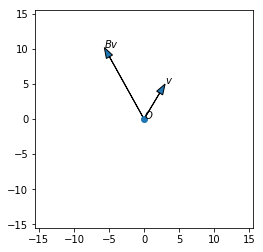

In [36]:
plt.plot(0, 0, 'o')
plt.annotate('$O$', [0, 0])
plt.arrow(0, 0, v[0], v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$v$', v)
plt.arrow(0, 0, B_v[0], B_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$Bv$', B_v)
plt.axis([-15.5, 15.5, -15.5, 15.5])
plt.gca().set_aspect('equal', adjustable='box')

## The determinant

The **determinant** of a matrix $A$, denoted $\det A$ or $|A|$, is a scalar value that can be computed from the elements of a square matrix and encodes certain properties of the linear transformation described by the matrix.

In the case of a 2-by-2 matrix
$$A = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$$
the determinant is given by
$$|A| = ad - bc.$$

The determinant can be thought of as the volume scaling factor of the linear transformation described by the matrix.

In particular, our rotation matrix

In [37]:
angle = math.pi / 3.   # In radians; equal to 60 degrees
A = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
A

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

preserves the volume, so

In [38]:
np.linalg.det(A)

1.0

whereas the matrix given by

In [39]:
2. * A

array([[ 1.        , -1.73205081],
       [ 1.73205081,  1.        ]])

quadruples it:

In [40]:
np.linalg.det(2. * A)

4.0000000000000009

The determinant is zero if and only if the matrix has linearly dependent columns (equivalently, linearly dependent rows):

In [41]:
A = np.array([[1., 0., 1.], [2., 1., 0.], [0., 0., 2.]])
A

array([[ 1.,  0.,  1.],
       [ 2.,  1.,  0.],
       [ 0.,  0.,  2.]])

In [42]:
np.linalg.det(A)

2.0

whereas

In [43]:
A = np.array([[1., 2., 1.], [2., 4., 0.], [0., 0., 2.]])
A

array([[ 1.,  2.,  1.],
       [ 2.,  4.,  0.],
       [ 0.,  0.,  2.]])

In [44]:
np.linalg.det(A)

C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\numpy\linalg\linalg.py:1804: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


0.0

## More on linear equations

Consider again one of the most basic and important problems in linear algebra &mdash; finding such a vector $\mathbf{x} \in \mathbb{R}^{n \times 1}$ that
$$A \mathbf{x} = \mathbf{b},$$
where $A \in \mathbb{R}^{m \times n}$ and $\mathbf{b} \in \mathbb{R}^{m \times 1}$, i.e., the solution of a linear system.

Remember the four views of matrix multiplication? One of them regards the product $A\mathbf{x}$ as a linear combination of the columns of $A$. Thus if we write
$$A = \begin{pmatrix} | & | &  & | \\ \mathbf{a}_{:,1} & \mathbf{a}_{:,2} & \cdots & \mathbf{a}_{:,n} \\ | & | & & |  \end{pmatrix}, \quad \mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix},$$
then $A\mathbf{x} = \mathbf{b}$ can be written as
$$x_1 \mathbf{a}_{:,1} + x_2 \mathbf{a}_{:,2} + \ldots + x_n \mathbf{a}_{:,n} = \mathbf{b}.$$

Thus, for this equation to have a solution, $\mathbf{b}$ must be expressible a linear combination of the columns of $A$.

It is easy to come up with examples where this is not possible. For example, consider
$$A = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}.$$

No linear combination of the columns of $A$ gives $\mathbf{b}$, so the equation $A\mathbf{x} = \mathbf{b}$ has no solutions.

The columns of $A$ generate a vector space whose elements are precisely their linear combinations. This vector space is called the **column space** of $A$, denoted $\text{col}(A)$, and it is a subspace of $\mathbb{R}^m$. The equation $A\mathbf{x} = \mathbf{b}$ has solutions if and only if $\mathbf{b}$ is in $\text{col}(A)$.

Now consider the following example:
$$A = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 2 \\ 0 & 0 & 0 \end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix} 0 \\ 5 \\ 0 \end{pmatrix}.$$

Now $\mathbf{b}$ is clearly in the column space of $A$. For example, we can express it as five times the second column of $A$, so
$$\mathbf{x} = \begin{pmatrix} 0 \\ 5 \\ 0 \end{pmatrix}$$
is a solution. However, we could also express it as $\frac{5}{2}$ times the third column of $A$, so
$$\mathbf{x} = \begin{pmatrix} 0 \\ 0 \\ 5/2 \end{pmatrix}$$
is also a solution. In fact, a suitable mixture of these two solutions will also be a solution. For example,
$$\mathbf{x} = \frac{1}{4} \begin{pmatrix} 0 \\ 5 \\ 0 \end{pmatrix} + \frac{3}{4} \begin{pmatrix} 0 \\ 0 \\ 5/2 \end{pmatrix} = \begin{pmatrix} 0 \\ \frac{5}{4} \\ \frac{15}{8} \end{pmatrix}$$
is a solution:

In [45]:
A = np.array([[1., 0., 0.], [0., 1., 2.], [0., 0., 0.]])
x = np.array([[0.], [5./4.], [15./8.]])
np.dot(A, x)

array([[ 0.],
       [ 5.],
       [ 0.]])

In fact, we could take any $w_1, w_2$ such that $w_1 + w_2 = 1$ and obtain a solution
$$\mathbf{x} = w_1 \begin{pmatrix} 0 \\ 5 \\ 0 \end{pmatrix} + w_2 \begin{pmatrix} 0 \\ 0 \\ 5/2 \end{pmatrix},$$
so there are infinitely many solutions:

In [46]:
A = np.array([[1., 0., 0.], [0., 1., 2.], [0., 0., 0.]])
w1 = -2.
w2 = 1. - w1
x = w1 * np.array([[0.], [5.], [0.]]) + w2 * np.array([[0.], [0.], [5./2.]])
np.dot(A, x)

array([[ 0.],
       [ 5.],
       [ 0.]])

Thus we have seen that $A\mathbf{x} = \mathbf{b}$ may have a single solution, infinitely many solutions, or no solutions at all.

## The homogeneous system

The linear system $A\mathbf{x} = \mathbf{0}$ is known as a **homogeneous system** &mdash; whereas the linear system $A\mathbf{x} = \mathbf{b}$ with $\mathbf{b} \neq \mathbf{0}$ is described as **nonhomogeneous**.

Clearly, for $A\mathbf{x} = \mathbf{0}$ to have any nontrivial solutions ($\mathbf{x} = \mathbf{0}$ is always a solution, a **trivial** solution), $A$ must have linearly dependent columns.

The solutions $\mathbf{x}$ of the homogeneous system form a vector space, known as the **nullspace** or **kernel**.

The dimension of the column space of $A$ is known as the **rank** of $A$, whereas the dimension of the **nullspace** of $A$ is known as the **nullity** of $A$.

If $A$ is an $m$-by-$n$ matrix, with $n$ columns, then, according to the **rank-nullity theorem**,
$$\text{rank}(A) + \text{nullity}(A) = n.$$

It can also be shown that the dimension of the vector space generated by the rows of $A$ &mdash; the **row space** of $A$ &mdash; is equal to the dimension of the column space of $A$ and is therefore also $\text{rank}(A)$.

Let us again consider the example
$$A = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 2 \\ 0 & 0 & 0 \end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix} 0 \\ 5 \\ 0 \end{pmatrix}.$$

The dimension of the column space of this matrix $A$ is two. Since this matrix does not have three linearly independent columns, it is not **full rank**.

Thus $\text{rank}(A) = 2$ and, by rank-nullity theorem, $\text{nullity}(A) = 3 - 2 = 1$.

Since $\text{nullity}(A) > 0$, the equation $A\mathbf{x} = \mathbf{0}$ has a nontrivial solution. Indeed, one such solution is given by
$$\mathbf{x} = \begin{pmatrix} 0 \\ 2 \\ -1 \end{pmatrix}.$$
All scalar multiples of $\mathbf{x}$ are also solutions. In fact, since $\text{nullity}(A) = 1$ this gives us *all* solutions of $A\mathbf{x} = \mathbf{0}$ (otherwise there would be a basis for the nullspace of $A$ with two elements).

## The invertible matrix theorem

Not all square $n$-by-$n$ matrices have inverses. The ones that do, are called **invertible** or **nonsingular**, or **nondegenerate**, whereas the ones that don't &mdash; **noninvertible**, or **singular**, or **degenerate**.

For example,

In [47]:
A = np.array([[1., 0., 1.], [2., 1., 0.], [0., 0., 2.]])
A

array([[ 1.,  0.,  1.],
       [ 2.,  1.,  0.],
       [ 0.,  0.,  2.]])

is invertible:

In [48]:
np.linalg.inv(A)

array([[ 1. ,  0. , -0.5],
       [-2. ,  1. ,  1. ],
       [ 0. ,  0. ,  0.5]])

so its effect on some vector, say,

In [49]:
v = np.array([[3.], [5.], [7.]])

In [50]:
np.dot(A, v)

array([[ 10.],
       [ 11.],
       [ 14.]])

can be reversed by $A^{-1}$:

In [51]:
np.dot(np.linalg.inv(A), np.dot(A, v))

array([[ 3.],
       [ 5.],
       [ 7.]])

Whereas

In [52]:
A = np.array([[1., 2., 1.], [2., 4., 0.], [0., 0., 2.]])
A

array([[ 1.,  2.,  1.],
       [ 2.,  4.,  0.],
       [ 0.,  0.,  2.]])

is singular. `np.linalg.inv` will raise an error if we try to apply it to this matrix.

You may have noticed that this matrix has linearly dependent columns. This is one way of seeing that this matrix is singular.

In fact, the **invertible matrix theorem** tells us that the following are all equivalent. Let $A$ be a square $n$-by-$n$ matrix:
* $A$ is invertible, that is $A$ has an inverse, $A^{-1}$, (is nonsingular, is nondegenerate).
* $\det A \neq 0$.
* $A$ has full rank; that is $\text{rank}(A) = n$.
* The equation $A\mathbf{x} = \mathbf{0}$ has only the trivial solution $\mathbf{x} = \mathbf{0}$.
* The nullspace (also known as kernel) of $A$ is trivial, that is, it contains only the zero vector.
* The nullity of $A$ is zero.
* The equation $A\mathbf{x} = \mathbf{b}$ has exactly one solution for each $mathbf{b} \in \mathbb{R}^n$.
* The columns of $A$ are linearly independent.
* The columns of $A$ span $\mathbb{R}^n$.
* The column space of $A$ is $\mathbb{R}^n$.
* The columns of $A$ form a basis for $\mathbb{R}^n$.
* The linear transformation mapping $\mathbf{x}$ to $A\mathbf{x}$ is a bijection from $\mathbb{R}^n$ to $\mathbb{R}^n$.
* The transpose of $A$, $A^{\intercal}$, is an invertible matrix.
* The number zero is not an [eigenvalue](https://en.wikipedia.org/wiki/Eigenvalue) of $A$.

## Gradients, Jacobians, and Hessians

At school we mostly study single-valued, univariate functions $f: \mathbb{R} \rightarrow \mathbb{R}$, such as $f: x \mapsto x^2$:

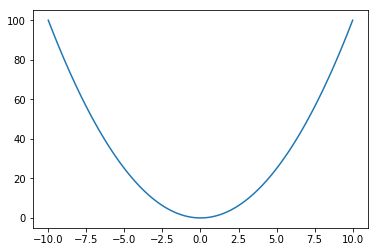

In [53]:
xs = np.linspace(-10., 10., 100)
plt.plot(xs, [x*x for x in xs]);

* A function is **single-valued** if its result is a scalar. We restrict ourselves to real numbers, so for us this will mean $f: \cdot \rightarrow \mathbb{R}$.
* A function is **multivalued** if its result is a two- or higher-dimensional vector, $f: \cdot \rightarrow \mathbb{R}^m$, $m > 1$.
* A function is **univariate** if its argument is a scalar, $f: \mathbb{R} \rightarrow \cdot$.
* A function is **multivariate** if its argument is a two- or higher-dimensional vector, $f: \mathbb{R}^n \rightarrow \cdot$, $n > 1$.

Matrices and vectors help us define multivalued, multivariate functions, e.g. if $\mathbf{x} \in \mathbb{R}^n$, $A \in \mathbb{R}^{m \times n}$, $\mathbf{b} \in \mathbb{R}^m$,
$$f(\mathbf{x}) = A\mathbf{x} + \mathbf{b},$$
we have a $\mathbb{R}^n \rightarrow \mathbb{R}^m$ function. Functions of this form are sometimes called **linear functions**.

Not all multivalued and multivariate functions are of this form, but many are. And, if $m = 1$, we still get a single-valued function.

Differentiation can be generalised to higher dimensions. Just as we know that single-valued, univariate functions, such as
$$f(x) = x^2$$
have derivatives
$$\frac{d}{dx} f(x) = 2x$$
and second derivatives
$$\frac{d^2}{dx^2} f(x) = 2,$$
multivariate functions $f: \mathbb{R}^n \rightarrow \cdot$ have partial derivatives
$$\frac{\partial}{\partial x_1} f(\mathbf{x}), \ldots, \frac{\partial}{\partial x_n} f(\mathbf{x})$$
and partial second derivatives
$$\frac{\partial^2}{\partial x_1^2} f(\mathbf{x}), \frac{\partial^2}{\partial x_1 x_2} f(\mathbf{x}), \ldots, \frac{\partial^2}{\partial x_1 x_n} f(\mathbf{x}), \frac{\partial^2}{\partial x_2 x_1} f(\mathbf{x}), \frac{\partial^2}{\partial x_2^2} f(\mathbf{x}), \frac{\partial^2}{\partial x_2 x_3} f(\mathbf{x}) \ldots, \frac{\partial^2}{\partial x_n^2} f(\mathbf{x}).$$

These are themselves *functions* (unless evaluated at a specific point, $\mathbf{x}_0$, in which case they become scalar or vector *values*), and if $f$ is $m$-valued, then so are they.

For single-valued functions, the vector of first derivatives is known as the **gradient** or **grad**:
$$\nabla f (\mathbf{x}) = \begin{pmatrix} \frac{\partial}{\partial x_1} f(\mathbf{x}) \\ \vdots \\ \frac{\partial}{\partial x_n} f(\mathbf{x}) \end{pmatrix}.$$

For multivalued functions, instead of the column vector gradient, one usualy works with the **Jacobian**:
$$J (\mathbf{x}) = \begin{pmatrix} \frac{\partial}{\partial x_1} f_1(\mathbf{x}) & \cdots & \frac{\partial}{\partial x_n} f_1(\mathbf{x}) \\ \vdots & \ddots & \vdots \\ \frac{\partial}{\partial x_1} f_m(\mathbf{x}) & \cdots & \frac{\partial}{\partial x_n} f_m(\mathbf{x}) \end{pmatrix}.$$

Notice that, for *single-valued* functions, the Jacobian is a row vector, a *transpose* of the gradient.

Also, for *single-valued* functions, it makes sense to define the matrix of second derivatives, the so-called **Hessian**:
$$H (\mathbf{x}) = \begin{pmatrix} \frac{\partial^2}{\partial x_1^2} f_1(\mathbf{x}) & \cdots & \frac{\partial^2}{\partial x_1 \partial x_n} f_1(\mathbf{x}) \\ \vdots & \ddots & \vdots \\ \frac{\partial^2}{\partial x_n x_1} f_m(\mathbf{x}) & \cdots & \frac{\partial^2}{\partial x_n^2} f_m(\mathbf{x}) \end{pmatrix}.$$

Just as the first and second derivative of a single-valued, univariate function can help us locate and classify its optimum, we need to look at the gradient/Jacobian of a multivariate function to locate and classify its optimum (minimum, maximum, saddle point).

Just as we can apply the (univariate) Newton-Leibnitz differential calculus to find the first and second derivatives, we can use the matrix calculus to deal with multi-valued/multivariate functions. Its rules can be found in Wikipedia: https://en.wikipedia.org/wiki/Matrix_calculus

## Bibliography

1. An excellent, deeper introduction to linear algebra can be found in Professor Gilbert Strang's video lectures for the *18.06 Linear Algebra* course at MIT: https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/
1. The supporting textbook for that course is *[Introduction to Linear Algebra](https://amzn.to/2S1QFsf)*, 5th edition, by Gilbert Strang.
1. A more recent version of this book updated for data science and deep learning is *[Linear Algebra and Learning from Data](https://amzn.to/2YEhC7S)*, by Gilbert Strang, published in 2019.
1. Another good text on linear algebra is *[Linear Algebra](https://amzn.to/2S5wPwk)*, 3rd edition, by John B. Fraleigh and Raymond A. Beauregard.
1. One may also be recommended to read *[Schaum's Outline of Linear Algebra](https://amzn.to/2S4j4xV)*, 6th edition, by Seymour Lipschutz and Marc Lipson.
1. Finally, we recommend getting hold of *M2N1 &mdash; Numerical Analysis* lecture notes by Brad Baxter, which, in addition to theory, contain some useful exercises: http://www.cato.tzo.com/brad/M2N1/m2n1_notes.pdf